In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.ndimage as nd
import lib.calc as c
import lib.kmap as k
import peakutils as pk
import skimage

from silx.io import specfile as spec # migrated from PyMca5!
from skimage import filters, exposure, restoration, morphology, feature, measure
from scipy.signal import savgol_filter
from ipywidgets import interact
from mpl_toolkits.axes_grid1 import ImageGrid

%matplotlib inline

In [7]:
# Initialise some variables
specdir = '/data/id01/inhouse/IHR/ihhc3426/spec/'
sample_name = 'e18016'
# See kmap specfiles corresponding to specified sample name
specfiles = !ls {specdir} | grep spec | grep _fast | grep -i {sample_name}
for index, fname in enumerate(specfiles): print(str(index)+'...'+str(fname))

0...e18016_fast_00002.spec
1...e18016_fast_00010.spec
2...e18016_fast_00016.spec
3...e18016_fast_00018.spec
4...e18016_fast_00020.spec
5...e18016_fast_00021.spec
6...e18016_fast_00040.spec
7...e18016_fast_00057.spec
8...e18016_fast_00077.spec
9...e18016_fast_00084.spec
10...e18016_fast_00085.spec
11...e18016_fast_00094.spec
12...e18016_fast_00098.spec
13...e18016_fast_00103.spec
14...e18016_fast_00105.spec
15...e18016_fast_00108.spec
16...e18016_fast_00110.spec


In [8]:
# specify filenum to inspect
i = 0
fname = specdir+specfiles[i]
sf = spec.SpecFile(fname)
n_scans = int(len(sf.list()))
print('{0} --> {1} scans'.format(specfiles[i],n_scans))

e18016_fast_00002.spec --> 9 scans


In [9]:
rois = ['roi4']
kmap = k.read_kmap(fname, 6, rois, motors=True)
piy, pix = kmap['motors'][0], kmap['motors'][1]
i = kmap[rois[0]]
ni = i/i.max()

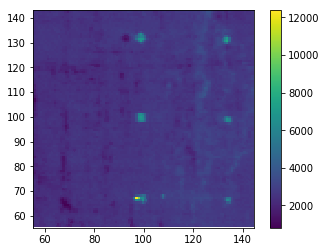

In [10]:
plt.pcolormesh(piy, pix, i)
plt.axis('image')
plt.colorbar()

In [6]:
#load the probe
fprobe = np.load('/data/id01/inhouse/leake/beamReconstructions/20180601-KB/ResultsScan0005/latest.npz')
probe = fprobe['probe'][0].real
nprobe = probe/probe.max()
sprobe = skimage.transform.rescale(nprobe,0.1)

/users/zatterin/Envs/py3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


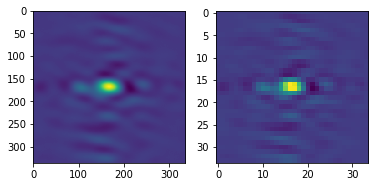

In [7]:
fig, ax = plt.subplots(1,2)

ax[0].imshow(nprobe)
ax[1].imshow(sprobe)

In [79]:
probepix = 1e9*fprobe['pixelsize'] # in nm
kmappix = 1e3*(piy.max()-piy.min())/i.shape[1] # in nm
ratio = kmappix/probepix

In [84]:
ratio**(-1)

0.013468630356764811

/users/zatterin/Envs/py3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


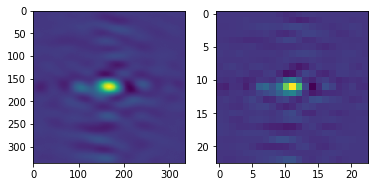

In [110]:
sprobe = skimage.transform.rescale(nprobe, ratio**(-1)*5)
fig, ax = plt.subplots(1,2)

ax[0].imshow(nprobe)
ax[1].imshow(sprobe)

/users/zatterin/Envs/py3/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


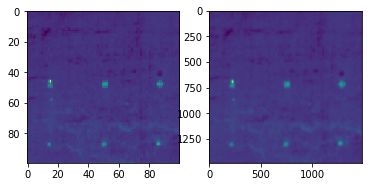

In [111]:
si = skimage.transform.rescale(ni, ratio/5)
fig, ax = plt.subplots(1,2)

ax[0].imshow(ni)
ax[1].imshow(si)

In [113]:
dsi = skimage.restoration.unsupervised_wiener(si,sprobe)

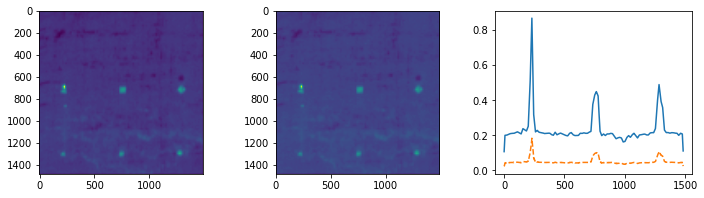

In [116]:
fig, ax = plt.subplots(1,3,figsize=(12,3))

ax[0].imshow(si)
ax[1].imshow(dsi[0])
ax[2].plot(si[700,:])
ax[2].plot(dsi[0][700,:],ls='--')

In [109]:
skimage.restoration.unsupervised_wiener?